# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Tandry Jordanio Simamora
- **Email:** tandrysimamora@gmail.com
- **ID Dicoding:** tandry_simamora

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara di tiap station dalam satu tahun 2016?
- Apakah terdapat jam-jam tertentu dimana kualitas udara cenderung buruk ?
- Apakah ada hari dalam seminggu yang memiliki kualitas udara lebih buruk dibandingkan hari lainnya?
- Apakah ada hubungan antara suhu dan kualitas udara  ?



## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fol

## Data Wrangling

Pada proses ini kita akan melakukan **Gatherind Data**, **Assesing Data** , dan **Cleaning Data**

### Gathering Data

In [2]:
#  Import data
Aotizhongxin = pd.read_csv('data/Data_Aotizhongxin.csv')
Changping = pd.read_csv('data/Data_Changping.csv')
Dingling = pd.read_csv('data/Data_Dingling.csv')
Dongsi = pd.read_csv('data/Data_Dongsi.csv')
Guanyuan = pd.read_csv('data/Data_Guanyuan.csv')
Gucheng = pd.read_csv('data/Data_Gucheng.csv')
Huairou = pd.read_csv('data/Data_Huairou.csv')
Nongzhanguan = pd.read_csv('data/Data_Nongzhanguan.csv')
Shunyi = pd.read_csv('data/Data_Shunyi.csv')
Tiantan = pd.read_csv('data/Data_Tiantan.csv')
Wanliu = pd.read_csv('data/Data_Wanliu.csv')
Wanshouxigong = pd.read_csv('data/Data_Wanshouxigong.csv')

# Membuat menjadi satu dataframe
data_df= [Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong]
data_gabungan = pd.concat(data_df, ignore_index=True)
print(data_gabungan.shape)


(420768, 18)


**Insight**
- Setelah semua dataset digabung terdapat 420768 row dan 18 Kolom
- Tedapat 12 dataset yang mewakili 12 Station pengamatan

Langkah selanjutnya, data yang sudah digabung akan ditampilkan. Pada kali ini kita hanya akan menampilkan 5 data teratas.

In [3]:
data_gabungan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Setelah digabung data memiliki total 42078 baris dan 18 kolom
- Terdiri dari 12 station

### Assessing Data

In [4]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Penjelasan**
Dari info yang didapatkan dari tabel diatas, diketahui bahwa tiap kolom yang ada tidak memiliki jumlah row yang sama, hal ini menunjukkan bahwa ada beberapa data yang hilang.

Langkah selanjutnya kita akan mencek berapa banyak data yang hilang dengan menggunakan function **isna()**

In [5]:
data_gabungan.isna().sum() #Mencek missing values

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


Dari Tabel yang dihasilkan didapatkan bahwa data yang hilang pada kolom-kolom pada data memiliki jumlah yang berbeda. Hal ini akan sangat berpengaruh pada data yang akan dianalisis. Sehingga kita perlu mengisi data yang kosong terlebih dahulu. Alih-alih menghapus data yang hilang kita akan mengisinya dengan rata-rata dari data yang ada.

Sebelum kita mengisi data yang missing, dicek terlebih dahulu duplikasi data yang ada dengan menggunakan fungsi **duplicated()**

In [7]:
grouped = data_gabungan.groupby('station')
duplicates = grouped.apply(lambda x: x.duplicated().sum(), include_groups=False)
print(duplicates)

station
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64


**Insights**
Tidak ada duplikasi pada data


In [8]:

data_gabungan.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


### Cleaning Data

**Missing Value**

In [ ]:
missing_values = grouped.apply(lambda x: x.drop(columns=[], errors='ignore').isna().sum(), include_groups=False)
print(missing_values)

               No  year  month  day  hour  PM2.5  PM10   SO2   NO2    CO  \
station                                                                    
Aotizhongxin    0     0      0    0     0    925   718   935  1023  1776   
Changping       0     0      0    0     0    774   582   628   667  1521   
Dingling        0     0      0    0     0    779   656   730  1234  2012   
Dongsi          0     0      0    0     0    750   553   663  1601  3197   
Guanyuan        0     0      0    0     0    616   429   474   659  1753   
Gucheng         0     0      0    0     0    646   381   507   668  1401   
Huairou         0     0      0    0     0    953   777   980  1639  1422   
Nongzhanguan    0     0      0    0     0    628   440   446   692  1206   
Shunyi          0     0      0    0     0    913   548  1296  1365  2178   
Tiantan         0     0      0    0     0    677   597  1118   744  1126   
Wanliu          0     0      0    0     0    382   284   575  1070  1812   
Wanshouxigon

**Insight**
Terdapat banyak nilai yang missing, kita akan mengisi nilai yang kosong dengan nilai meannya.

In [9]:
# Periksa jumlah missing values di tiap kolom
print("Jumlah missing values per kolom:")
print(data_gabungan.isna().sum())

# Hitung mean/median tiap station untuk data numerik
grouped = data_gabungan.groupby("station")

# Isi nilai NaN untuk kolom numerik dengan mean per station
for column in data_gabungan.select_dtypes(include=np.number).columns:
    data_gabungan[column] = grouped[column].transform(lambda x: x.fillna(x.mean()))

# Pastikan tidak ada lagi missing values
print("Jumlah missing values setelah imputasi:")
print(data_gabungan.isna().sum())

Jumlah missing values per kolom:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
Jumlah missing values setelah imputasi:
No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64


Dari tabel diatas kita sudah mengisi data tiap kolom dengan data mean yang ada yang dikelompokkan per station. Namun jika kita liat kolom wd masih memiliki missing values sebanyak 1822, Hal ini dikarenakan data wd yang berbentuk string. Maka dari itu kita akan mengganti nilai yang missing dengan menggunakan data modus/ data yang paling sering muncul

Untuk menghitung modus kita menggunakan function value_count().

In [10]:
data_gabungan.wd.value_counts()

,count
wd,
NE,43335
ENE,34142
NW,32600
N,30869
E,29752
SW,28756
NNE,28232
NNW,25326
WNW,24375


Dari tabel diatas didapatkan bahwa data yang paling sering muncul adalah NE. Maka untuk data yang hilang akan kita ganti menjadi NE.

In [11]:
data_gabungan.fillna(value="NE", inplace=True)

In [12]:
data_gabungan.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight**
Data sudah terisi semua


## Exploratory Data Analysis (EDA)

### Explore Data Tiap Station yang dikelompokkan per tahun

Tujuan dari kode dibawah iyalah untuk mengeksplorasi data mean / rata-rata dari tiap parameter yang dikelompokkan tiap stasiun.

In [23]:
selected_columns = ['PM2.5', 'PM10', 'SO2', 'station', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
grouped_data = data_gabungan[selected_columns].groupby("station").mean(numeric_only=True)
print(grouped_data)

                   PM2.5        PM10        SO2        NO2           CO  \
station                                                                   
Aotizhongxin   82.773611  110.060391  17.375901  59.305833  1262.945145   
Changping      71.099743   94.657871  14.958906  44.182086  1152.301345   
Dingling       65.989497   83.739723  11.749650  27.585467   904.896073   
Dongsi         86.194297  110.336742  18.531107  53.699443  1330.069131   
Guanyuan       82.933372  109.023303  17.590941  57.901643  1271.294377   
Gucheng        83.852089  118.861978  15.366162  55.871075  1323.974423   
Huairou        69.626367   91.482690  12.121553  32.497250  1022.554545   
Nongzhanguan   84.838483  108.991096  18.689242  58.097172  1324.350198   
Shunyi         79.491602   98.737026  13.572039  43.908865  1187.063979   
Tiantan        82.164911  106.363672  14.367615  53.162646  1298.303318   
Wanliu         83.374716  110.464618  18.376481  65.258789  1319.353513   
Wanshouxigong  85.024136 

**Insight**
1. Curah Hujan/ RAIN memiliki rata-rata yang cenderung sama di setiap station
2. Suhu/TEMP di tiap station cenderung sama yaitu di rentang 12-13 derajat
3. Parameter yang lain memiliki nilai yang berbeda di tiap station nya


Dibawah ini kita melihat rata-rata dari dataset yang dikelompokkan per tahunnya. kita menggunakan .groupby(year)

In [34]:
data_gabungan.groupby('year').mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,80.004889,102.780319,19.947477,52.252588,1207.321700,57.255940,15.689776,1007.734448,5.473022,0.066097,1.599125
2014,11724.5,6.526027,15.720548,11.5,85.397667,115.844512,20.693014,54.552918,1255.870434,58.237894,13.915797,1010.641329,2.742005,0.049795,1.637814
2015,20484.5,6.526027,15.720548,11.5,79.628135,103.615074,13.054381,48.305570,1257.188172,59.197334,13.434047,1011.113707,2.628030,0.076100,1.772082
2016,29256.5,6.513661,15.756831,11.5,72.091085,94.762961,9.901344,46.425161,1140.317107,57.464737,13.574593,1011.224742,2.160823,0.076027,1.844862
2017,34356.5,1.474576,15.288136,11.5,92.502930,111.059113,18.108466,57.253897,1591.192606,40.185819,0.479867,1021.776600,-13.335987,0.003303,1.998807


**Insight**
1. Dari tabel yang ditampilkan didapatkan bahwa rata-rata temperatur tertinggi ialah di tahun 2013 yaitu 15.6897 dan terendah pada 2017 yaitu 0.47
2. Curah hujan tertinggi pada tahun 2015 dan terendah pada 2017.
3. PM2.5 tertinggi didapatkan pada tahun 2017 dan terendah pada 2016.


Selanjutnya kita akan mencari distribusi dari nilai tiap parameter yang ada, yang divisualisasikan dnegna menggunakan histogram.
Kita menggunakan function .hist()

Disini juga kita melihat rata-rata data yang dikelompokkan per bulannya mulai dari Januari hingga Desember

In [35]:
data_gabungan.groupby('month').mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,93.490874,113.126059,31.297451,61.454989,1841.923779,28.304627,-1.727151,1022.062535,-14.675308,0.000641,1.874805
2,21612.287611,2015.504425,14.628319,11.5,87.396416,102.703785,27.942248,50.248632,1380.517544,41.290456,1.174666,1020.260462,-12.939881,0.010216,2.006656
3,13518.500000,2014.500000,16.000000,11.5,94.491419,135.713262,27.839036,59.893726,1308.058724,51.165656,8.348708,1013.957053,-7.944719,0.007592,1.976319
4,14250.500000,2014.500000,15.500000,11.5,72.900165,116.732162,14.247001,47.517331,851.131010,69.894145,15.328909,1008.307401,0.187078,0.022885,2.173886
5,14982.500000,2014.500000,16.000000,11.5,63.507521,106.871624,14.087330,42.581374,819.359479,90.984224,21.481829,1002.394530,6.876951,0.045874,2.065600
6,15714.500000,2014.500000,15.500000,11.5,69.334091,86.948964,8.078934,39.493995,1002.175977,93.621109,24.554861,999.335043,15.612283,0.132986,1.576930
7,16446.500000,2014.500000,16.000000,11.5,71.966117,84.934085,5.806348,36.044974,918.887093,94.002092,27.194170,998.131404,19.920511,0.267686,1.497536
8,17190.500000,2014.500000,16.000000,11.5,53.845872,71.800564,4.843588,36.319700,840.976164,87.436003,26.639523,1001.235215,18.927295,0.096399,1.448830
9,17922.500000,2014.500000,15.500000,11.5,61.907288,80.040497,6.509434,45.736093,934.205086,55.168566,20.747855,1008.674769,13.938923,0.124533,1.349956


Juga kita lihat rata-rata datanya per hari nya dalam 1 bulan.

In [36]:
data_gabungan.groupby('day').mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17198.500000,2014.666667,6.500000,11.5,88.765109,110.412385,13.900626,50.322689,1295.294073,55.232176,13.350263,1010.098710,2.647280,0.123532,1.716023
2,17222.500000,2014.666667,6.500000,11.5,73.962320,92.598521,16.253123,50.603388,1231.555436,54.095726,13.482783,1009.361910,2.172549,0.058265,1.703274
3,17246.500000,2014.666667,6.500000,11.5,83.031928,109.650546,16.436402,52.120031,1339.707709,58.747729,13.957870,1009.456387,1.736698,0.003848,1.824834
4,17270.500000,2014.666667,6.500000,11.5,88.605153,112.010828,15.301549,52.846061,1402.001632,58.622814,13.511983,1009.810886,2.432094,0.107947,1.749467
5,17294.500000,2014.666667,6.500000,11.5,76.463959,100.955929,14.430392,46.883320,1225.762975,62.981038,13.789557,1010.937618,2.385250,0.042130,1.811552
6,17318.500000,2014.666667,6.500000,11.5,85.837860,106.186318,17.559544,49.961536,1313.918919,59.278197,13.308767,1011.412791,2.213967,0.070184,1.624928
7,17342.500000,2014.666667,6.500000,11.5,84.706034,104.026239,16.547047,49.706937,1320.347308,58.021390,13.475859,1011.231266,2.808329,0.114923,1.685377
8,17366.500000,2014.666667,6.500000,11.5,81.222442,101.795450,17.153902,48.130189,1193.752456,59.136431,13.177549,1011.305957,1.692037,0.033896,1.873492
9,17390.500000,2014.666667,6.500000,11.5,70.942343,96.018128,14.113443,47.266293,1121.122009,56.912557,12.628663,1011.725482,1.521564,0.035790,1.823551


Kita juga melihat rata-rata data per jam nya dalam sehari

In [37]:
data_gabungan.groupby('hour').mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,87.451083,114.687271,15.026984,57.727264,1366.188874,42.340227,11.278589,1011.172582,3.131189,0.068201,1.357848
1,17522.0,2014.66256,6.52293,15.729637,86.436186,111.005347,15.032009,55.576710,1369.214949,38.705624,10.818985,1011.108124,3.174201,0.052657,1.322115
2,17523.0,2014.66256,6.52293,15.729637,84.430091,106.565505,14.674793,53.172954,1316.207928,34.915408,10.372304,1011.055858,3.122566,0.066195,1.281523
3,17524.0,2014.66256,6.52293,15.729637,81.962689,102.177412,13.674472,52.227964,1272.303174,33.686673,9.978213,1010.984893,3.033078,0.093452,1.257472
4,17525.0,2014.66256,6.52293,15.729637,79.295527,97.749110,13.200430,51.583697,1237.213325,33.144296,9.654892,1010.984779,2.912994,0.069538,1.234868
5,17526.0,2014.66256,6.52293,15.729637,76.438410,93.845697,12.770394,50.598490,1248.695816,29.248233,9.434292,1011.131723,2.839823,0.052107,1.248679
6,17527.0,2014.66256,6.52293,15.729637,74.314310,92.291282,12.742091,50.713679,1263.860887,28.039485,9.624063,1011.398527,2.820658,0.044678,1.292502
7,17528.0,2014.66256,6.52293,15.729637,73.373281,93.840450,13.212396,52.510038,1290.502910,26.369469,10.526876,1011.730943,2.769016,0.040022,1.410724
8,17529.0,2014.66256,6.52293,15.729637,74.603617,98.564628,14.801102,54.191118,1336.625731,27.892134,11.904101,1012.009343,2.650145,0.038855,1.569884


**Insight**
1. Dari data histogram yang didapatkan untuk PM2.5, PM10, SO2, NO2, CO, O3, WSPM memiliki bentuk skewed right  yang brarti histogram miring ke kanan yang dapat disimpulkan bahwa rata-rata lebih besar daripada nilai median, dan median lebih besar daripada modus

2. Untuk TEMP, PRES, dan DEWP memiliki bentuk yang cenderung simetris, yang dapat disimpulkan bahwa data terdistribusi normal

In [ ]:
data_gabungan.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,NaN,1.729701,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.984694,91.075152,21.420157,34.677400,1131.69545,55.767436,11.430737,10.469404,13.787251,0.820624,NaN,1.245924,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- Dari data diatas diketahui bahwa polutan dengan kadar tertinggi adalah CO
- Terdapat 12 station
- Data terdiri dari 12 bulan, 31 hari, dan 23 jam
- Temperatur tertinggi setinggi 41.6 derajat
- DEWP tertinggi setingi 1042.80


In [ ]:
parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']

# Create the pivot table
pivot_table = pd.pivot_table(
    data_gabungan,
    values=parameters,
    index='station',
    aggfunc={'PM2.5': ['min', 'max', 'mean'],
             'PM10': ['min', 'max', 'mean'],
             'SO2': ['min', 'max', 'mean'],
             'NO2': ['min', 'max', 'mean'],
             'CO': ['min', 'max', 'mean'],
             'O3': ['min', 'max', 'mean'],
             'TEMP': ['min', 'max', 'mean'],
             'PRES': ['min', 'max', 'mean'],
             'DEWP': ['min', 'max', 'mean'],
             'RAIN': ['min', 'max', 'mean']}


)
# Display the pivot table
print(pivot_table)

                    CO                      DEWP                    NO2  \
                   max         mean    min   max      mean   min    max   
station                                                                   
Aotizhongxin   10000.0  1262.945145  100.0  28.5  3.123062 -35.3  290.0   
Changping      10000.0  1152.301345  100.0  27.2  1.505495 -35.1  226.0   
Dingling       10000.0   904.896073  100.0  27.2  1.505495 -35.1  205.0   
Dongsi         10000.0  1330.069131  100.0  28.8  2.447535 -35.3  258.0   
Guanyuan       10000.0  1271.294377  100.0  28.5  3.123062 -35.3  270.0   
Gucheng        10000.0  1323.974423  100.0  27.4  2.610442 -34.6  276.0   
Huairou        10000.0  1022.554545  100.0  29.1  2.238619 -43.4  231.0   
Nongzhanguan   10000.0  1324.350198  100.0  28.8  2.447535 -35.3  273.0   
Shunyi         10000.0  1187.063979  100.0  27.5  2.465036 -36.0  258.0   
Tiantan        10000.0  1298.303318  100.0  28.8  2.447535 -35.3  241.0   
Wanliu         10000.0  1

**Insight**
1. Rata-rata CO di setiap station relative sama dengan
2. Temperatur tertinggi sebesar 41.6 derajat di Station Gucheng, sedangkan terendah 40.5 derajat di Aothizongxin
3. Curah Hujan tertinggi 72.5 di 3 station yaitu Aothizongxin, Guanyuan, Wanliu


Selanjutnya kita melihat korelasi data antar parameter yang ada. Untuk mencarinya kita menggunakan function .corr().

In [38]:
data_gabungan.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.023172,-0.043687,-0.224095,-0.043975,0.018910,-0.049555,-0.122333,0.188170,-0.101908,0.004874,0.054198
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.025448,-0.037279,-0.168309,-0.053742,0.007471,-0.023462,-0.151672,0.186507,-0.164690,0.000975,0.087433
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.010391,-0.025101,-0.211566,0.041876,0.045590,-0.102074,0.131218,-0.012714,0.265565,0.016053,-0.139570
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.003566,0.026073,-0.004797,0.010393,-0.014943,0.002662,0.014381,0.021741,0.023058,-0.003697,-0.011637
hour,0.000684,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011584,0.051043,0.029702,-0.001153,-0.030524,0.277932,0.141925,-0.038340,-0.012210,0.012376,0.140441
PM2.5,-0.023172,-2.544848e-02,1.039054e-02,3.566370e-03,1.158405e-02,1.000000,0.879403,0.477780,0.658936,0.768866,-0.147605,-0.129770,0.018710,0.113480,-0.014151,-0.269075
PM10,-0.043687,-3.727920e-02,-2.510091e-02,2.607297e-02,5.104282e-02,0.879403,1.000000,0.458736,0.646260,0.686963,-0.110404,-0.095537,-0.017407,0.069672,-0.026379,-0.181959
SO2,-0.224095,-1.683087e-01,-2.115656e-01,-4.797311e-03,2.970192e-02,0.477780,0.458736,1.000000,0.492662,0.525420,-0.162966,-0.318315,0.220974,-0.264086,-0.040072,-0.107646
NO2,-0.043975,-5.374241e-02,4.187619e-02,1.039323e-02,-1.153463e-03,0.658936,0.646260,0.492662,1.000000,0.689799,-0.464562,-0.274364,0.173893,-0.031358,-0.043521,-0.394088
CO,0.018910,7.470970e-03,4.558960e-02,-1.494269e-02,-3.052351e-02,0.768866,0.686963,0.525420,0.689799,1.000000,-0.305688,-0.318001,0.183570,-0.055777,-0.012976,-0.289998


**Insight**
1. Dari hasil visualisasi diatas menunjukkan bahwa jika PM10 meningkat maka PM2.5 juga cenderung menignkat
2. TEMP, PRES, DEWP, RAIN memiliki korasi rendah, yang brarti parameter ini tidak terlalu memengaruhi konsentrasi udara (PM2.5)

## Visualization & Explanatory Analysis

### Bagaimana Tren kualitas udara di tiap station tahun 2016 ?

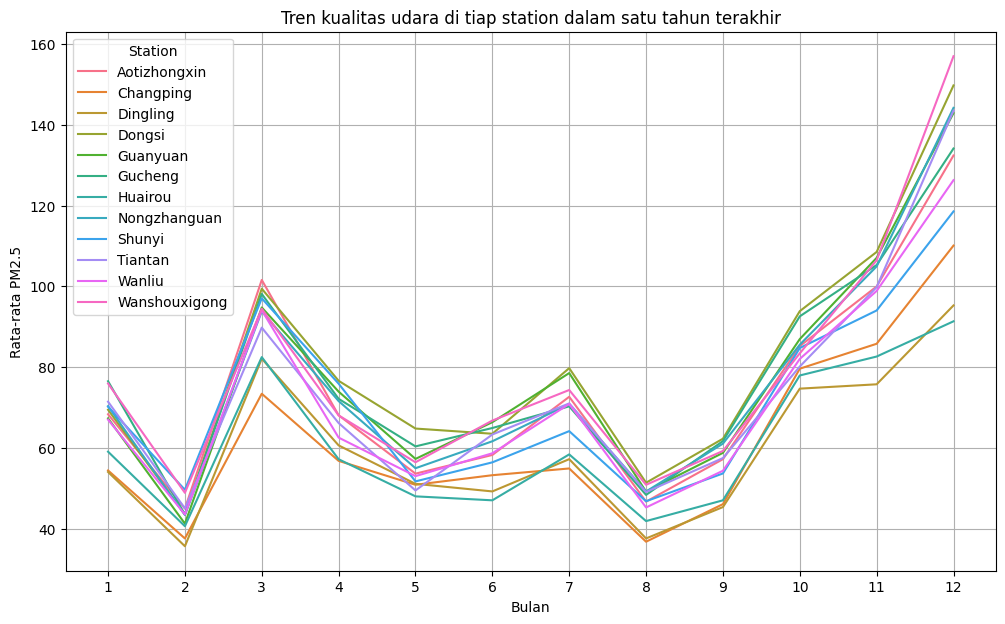

In [ ]:
# Kelompokkan data by station dan bulan, disini saya menggunakan PM2.5 untuk parameter nya
data_gabungan['date'] = pd.to_datetime(data_gabungan[['year', 'month', 'day']])
data_tahun_2016 = data_gabungan[data_gabungan['date'].dt.year == 2016]
montly_avg_pm25 = data_tahun_2016.groupby(['station', 'month'])['PM2.5'].mean().reset_index()
# visualisasi
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='PM2.5', hue='station', data=montly_avg_pm25)
plt.title('Tren kualitas udara di tiap station dalam satu tahun terakhir')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Station')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**Insight**
- Dara visualisasi data yang didapatkan, data PM2.5 tiap bulannya di 2016 berfluktuatif dengan peningkatan yang signifikan di antara bulan 10 hingga 12.
- Konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan tertentu, terutama pada bulan 2 dan 12
-Konsentrasi terendah umumnya terjadi sekitar bulan 7-8, menunjukkan bahwa kualitas udara relatif lebih baik pada periode tersebut.
- Semua stasiun menunjukkan pola tren yang mirip, denan peningkatan pada awal dan akhir tahun dan penurunan pada pertengahan tahun.



###Apakah terdapat jam-jam tertentu dimana kualitas udara cenderung buruk ?


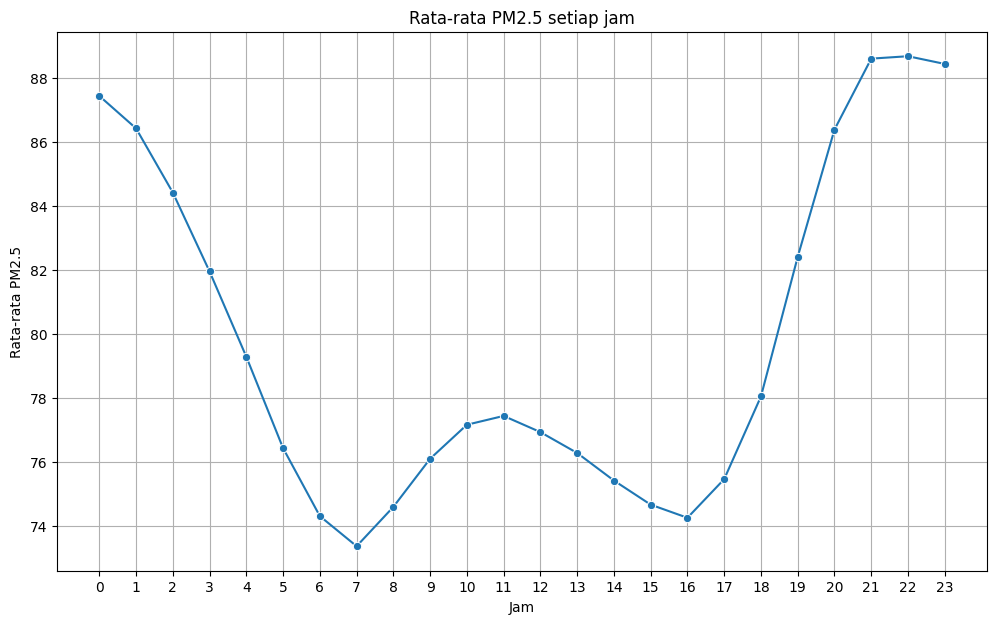

Jam-jam dengan kualitas udara cenderung buruk (PM2.5 > 65):  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
hourly_avg_pm25 = data_gabungan.groupby('hour')['PM2.5'].mean().reset_index()

# visualisasi
plt.figure(figsize=(12, 7))
sns.lineplot(x='hour', y='PM2.5', data=hourly_avg_pm25, marker='o')
plt.title('Rata-rata PM2.5 setiap jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Menurut BMKG ambang batas PM2.5 adalah 65
bad_air_quality = hourly_avg_pm25[hourly_avg_pm25['PM2.5'] > 65]['hour'].tolist()
print(f"Jam-jam dengan kualitas udara cenderung buruk (PM2.5 > 65):  {bad_air_quality}")

**Insight:**
- Rata-rata PM2.5 di tiap jamnya cenderung buruk
- Nilai rata-rata PM2.5 tertinggi ialah 88.692261 pada pukul 22 dan terendah ialah 73.373281 pada pukul 7


### Apakah ada hari dalam seminggu yang memiliki kualitas udara lebih buruk dibandingkan hari lainnya

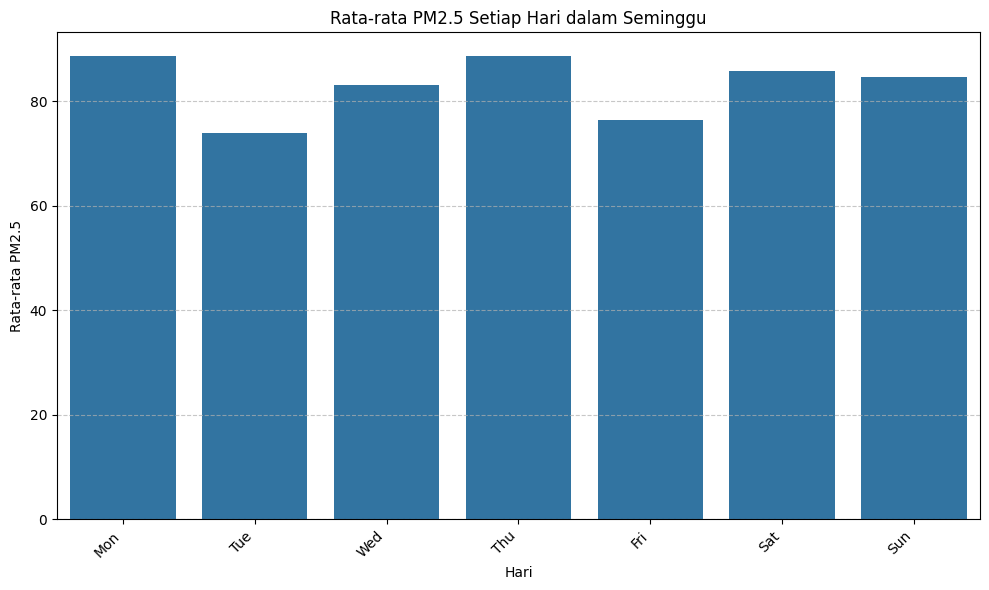

In [ ]:
# Pemetaan nama hari
day_names = {
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
    7: 'Sun'
}

# Tambahkan kolom nama hari berdasarkan angka hari
data_gabungan['day_of_week'] = data_gabungan['day'].map(day_names)

# Hitung rata-rata PM2.5 per hari dalam seminggu
day_of_week_avg_pm25 = (
    data_gabungan.groupby('day_of_week', as_index=False)['PM2.5']
    .mean()
)

# Visualisasikan dengan bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='PM2.5', data=day_of_week_avg_pm25, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Rata-rata PM2.5 Setiap Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45, ha='right')  # Rotasi label x untuk visibilitas lebih baik
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid horizontal untuk keterbacaan
plt.tight_layout()
plt.show()


**Insight**
- Rata-rata konsentrasi PM2.5 relatif stabil sepanjang minggu, dengan sedikit variasi
- Selasa dan Jumat memiliki rata-rata PM2.5 yang lebih rendah dibandingkan hari lainnya.
- Grafik menunjukkan bahwa meskipun ada perbedaan kecil antar hari, tidak ada perbedaan yang sangat mencolok. Hal ini menunjukkan bahwa polusi PM2.5 tidak sepenuhnya dikendalikan oleh hari dalam seminggu, tetapi mungkin lebih dipengaruhi oleh faktor musiman, cuaca, atau sumber polusi lainnya.

### Apakah ada hubungan antara suhu dan kualitas udara  ?

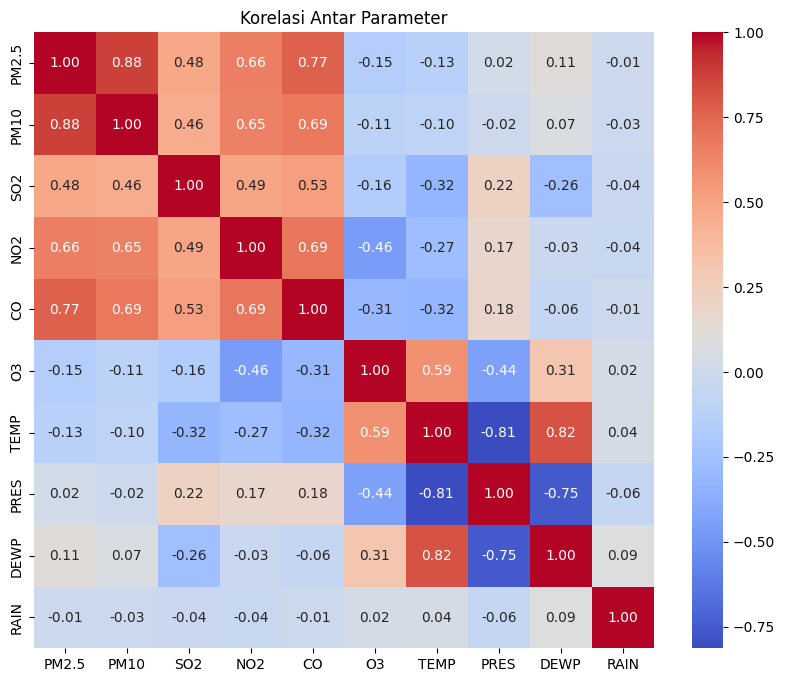

In [ ]:
data_corr = data_gabungan[parameters]
correlation_matrix = data_corr.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Parameter')
plt.show()

**Insight**
1. Dari hasil visualisasi diatas menunjukkan bahwa jika PM10 meningkat maka PM2.5 juga cenderung menignkat
2. TEMP, PRES, DEWP, RAIN memiliki korasi rendah, yang brarti parameter ini tidak terlalu memengaruhi konsentrasi udara (PM2.5)
3. Hubungan yang kuat antara Karbon monoksida dengan PM2.5 (0.77) dengan Nitrogen dioksida NO2 (0.69).
4. Parameter seperti O3 dan PM2.5 (-0.15) serta NO2 dengan SO2 (0.49) menunjukkan korelasi yang lebih lemah.

## Analisis Lanjutan (Opsional)

**Distribusi tiap parameter di tiap station**

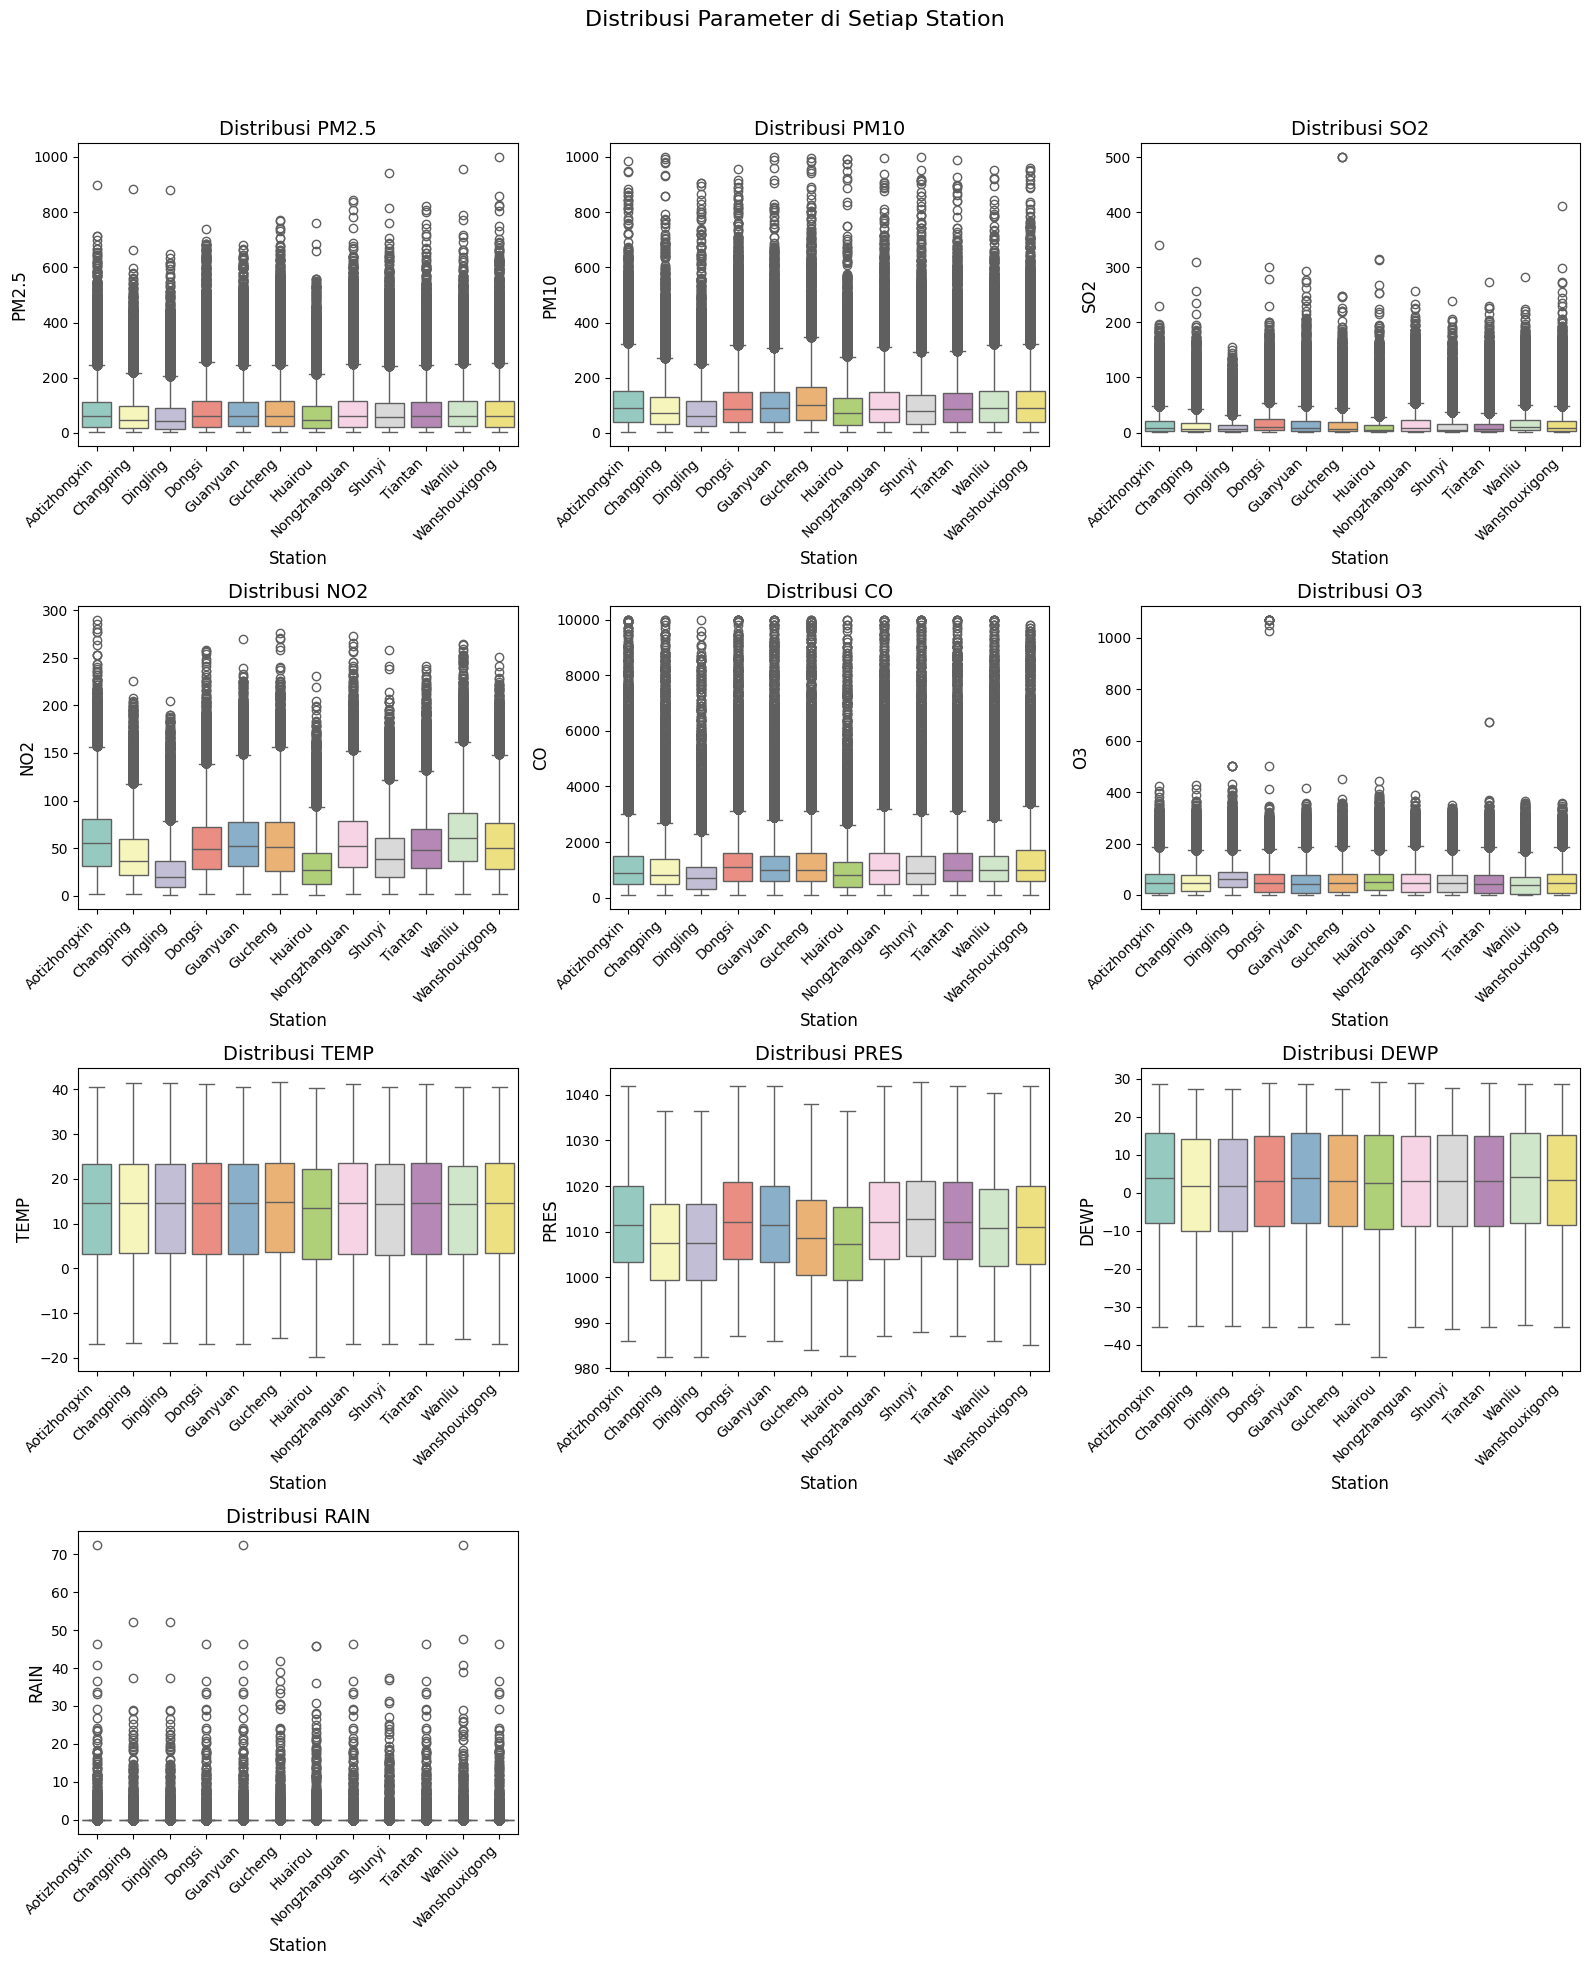

In [ ]:
plt.figure(figsize=(16,20))

# Looping untuk membuat subplot tiap parameter
for i, param in enumerate(parameters, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data_gabungan, x='station', y=param, hue='station', palette='Set3')
    plt.title(f'Distribusi {param}', fontsize=14)
    plt.xlabel('Station', fontsize=12)
    plt.ylabel(param, fontsize=12)
    plt.xticks(rotation=45, ha='right') # Corrected typo: 'xtixk' to 'xticks'

plt.suptitle('Distribusi Parameter di Setiap Station', fontsize=16)
plt.tight_layout(rect=[0,0, 1, 0.95])
plt.show()

**Insight**
- PM2.5 dan PM10 menunjukkan distribusi yang relatif seragam, dengan beberapa station yang memiliki pencilan seperti  Changping dan Dingling
- Distribusi SO2 cenderung rendah hampir di semua station, dengan beberapa nilai outlier di beberapa station seperti Gucheng
- Distrubsi CO2 memiliki konsentrasi tinggi di beberapa station seperti Aotizhongxin
- TEMP memiliki distribusi yang cukup beragam di seluruh station dengan variablitas tinggi, mencerminkan perubahan suhu musiman
- PRES / Tekanan atmosfer menunjukkakn perubahan kecil antar-stasiun
- RAIN memiliki nilai yang dominan rendah di semua station.


## Conclusion


**Pertanyaan 1** (*Bagaimana tren kualitas udara di tiap station dalam satu tahun 2016?*)
- Dara visualisasi data yang didapatkan, data PM2.5 tiap bulannya di 2016 berfluktuatif dengan peningkatan yang signifikan di antara bulan 10 hingga 12.
- Konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan tertentu, terutama pada bulan 2 dan 12
-Konsentrasi terendah umumnya terjadi sekitar bulan 7-8, menunjukkan bahwa kualitas udara relatif lebih baik pada periode tersebut.
- Semua stasiun menunjukkan pola tren yang mirip, denan peningkatan pada awal dan akhir tahun dan penurunan pada pertengahan tahun.


**Pertanyaan 2** (*Apakah terdapat jam-jam tertentu dimana kualitas udara cenderung buruk ?*)
- Rata-rata PM2.5 di tiap jamnya cenderung buruk
- Nilai rata-rata PM2.5 tertinggi ialah 88.692261 pada pukul 22 dan terendah ialah 73.373281 pada pukul 7


**Pertanyaan 3** *(Apakah ada hari dalam seminggu yang memiliki kualitas udara lebih buruk dibandingkan hari lainnya?)*
- Rata-rata konsentrasi PM2.5 relatif stabil sepanjang minggu, dengan sedikit variasi
- Selasa dan Jumat memiliki rata-rata PM2.5 yang lebih rendah dibandingkan hari lainnya.
- Grafik menunjukkan bahwa meskipun ada perbedaan kecil antar hari, tidak ada perbedaan yang sangat mencolok. Hal ini menunjukkan bahwa polusi PM2.5 tidak sepenuhnya dikendalikan oleh hari dalam seminggu, tetapi mungkin lebih dipengaruhi oleh faktor musiman, cuaca, atau sumber polusi lainnya.


**Pertanyaan 4** *( Apakah ada hubungan antara suhu dan kualitas udara  ?)*
-  Dari hasil visualisasi diatas menunjukkan bahwa jika PM10 meningkat maka PM2.5 juga cenderung menignkat
- TEMP, PRES, DEWP, RAIN memiliki korasi rendah, yang brarti parameter ini tidak terlalu memengaruhi konsentrasi udara (PM2.5)
- Hubungan yang kuat antara Karbon monoksida dengan PM2.5 (0.77) dengan Nitrogen dioksida NO2 (0.69).
- Parameter seperti O3 dan PM2.5 (-0.15) serta NO2 dengan SO2 (0.49) menunjukkan korelasi yang lebih lemah.



**Analsiis Lanjutan**
- PM2.5 dan PM10 menunjukkan distribusi yang relatif seragam, dengan beberapa station yang memiliki pencilan seperti  Changping dan Dingling
-  Distribusi SO2 cenderung rendah hampir di semua station, dengan beberapa nilai outlier di beberapa station seperti Gucheng
-  Distrubsi CO2 memiliki konsentrasi tinggi di beberapa station seperti Aotizhongxin
-  TEMP memiliki distribusi yang cukup beragam di seluruh station dengan variablitas tinggi, mencerminkan perubahan suhu musiman
- PRES / Tekanan atmosfer menunjukkakn perubahan kecil antar-stasiun
- RAIN memiliki nilai yang dominan rendah di semua station.

In [ ]:
data_gabungan.to_csv('data_gabungan.csv', index=False)